In [1]:
from scriptForConvertUnits import convertUnits
from scriptForGetFree import getTable

In [2]:
# 国際小包
s = getTable("https://www.post.japanpost.jp/int/charge/list/parcel3.html")
key = s.check_order()  # テーブルのタイトルを取得
results = s.maketable() #データフレーム生成生成
df_parcel3 = {k:convertUnits(results[i][0]) for i,k in enumerate(key[:3])}

# EMS
s = getTable("https://www.post.japanpost.jp/int/charge/list/ems3.html")
results = s.maketable() #データフレーム生成
df_parcel3['EMS'] = convertUnits(results[0][0])  #作成したデータフレームを追加

s = getTable("https://www.post.japanpost.jp/int/charge/list/normal2.html")
results = s.maketable()  #データフレーム形成

# 全角混ざりを修正
results[9][0].iloc[0]['重量'] = "20gまで"
results[11][0].iloc[0]['重量'] = "20gまで"

# かっこを修正
results[11][0]["料金"] = results[11][0]["料金"].str.extract('\((.*)\)')
results[11][0].iat[0,2] = results[11][0].iloc[1]["料金"]
results[13][0]["料金"] = results[13][0]["料金"].str.extract('(\d,?\d{3})')

# テーブルのタイトルを取得します。第一列のヘッダーと一列一行目を使います。
key = [':'.join([i[0].columns[0], i[0].iloc[0][i[0].columns[0]]]) for i in results]

# どの(何番目の)テーブルを使うか確認します。
for i,k in enumerate(key):
    print(i,k)
    
# '航空便:印刷物', '航空便:小形包装物', '船便:印刷物', '船便:小形包装物', 'SAL便:印刷物', 'SAL便:小形包装物'のみ抽出
df_normal2 = {k:convertUnits(results[i][0]) for i,k in enumerate(key) if i in [3,4,11,12,15,16]} 


0 航空便:手紙（定形）
1 航空便:グリーティングカード
2 航空便:はがき
3 航空便:印刷物
4 航空便:小形包装物
5 航空便:Dメール
6 航空便:特別郵袋印刷物
7 航空便:航空書簡
8 航空便:盲人用郵便物
9 船便:手紙（定形・定形外）
10 船便:はがき
11 船便:印刷物
12 船便:小形包装物
13 船便:特別郵袋印刷物
14 船便:盲人用郵便物
15 SAL便:印刷物
16 SAL便:小形包装物
17 SAL便:特別郵袋印刷物


In [3]:
print("df_parcel3's keys:",df_parcel3.keys())
print("df_normal2's keys:",df_normal2.keys())

df_parcel3's keys: dict_keys(['航空便', '船便', 'エコノミー航空(SAL)便', 'EMS'])
df_normal2's keys: dict_keys(['航空便:印刷物', '航空便:小形包装物', '船便:印刷物', '船便:小形包装物', 'SAL便:印刷物', 'SAL便:小形包装物'])


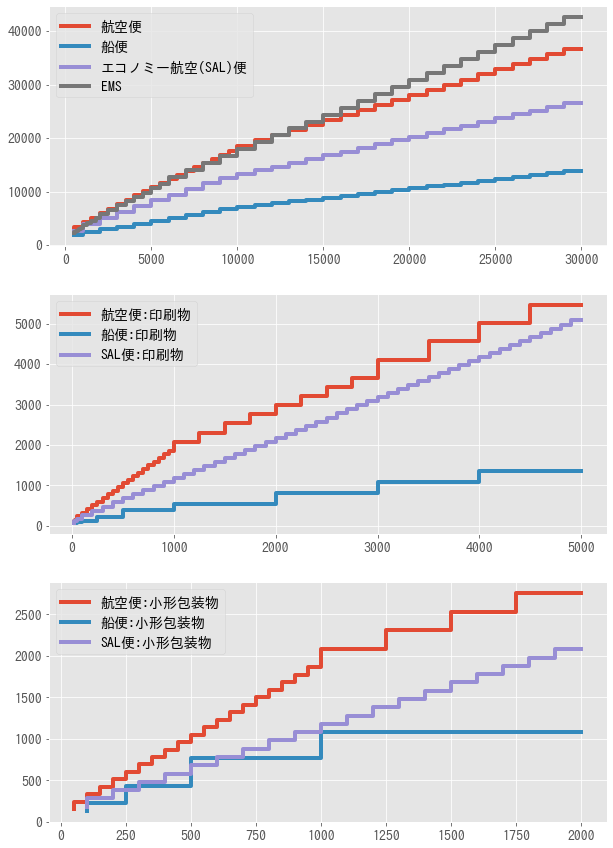

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
plt.style.use('ggplot')
mpl.rc('lines', linewidth=4, linestyle='-')
font = {"family": "IPAGothic"}
mpl.rc('font', **font)
plt.rcParams['font.size'] = 14


fig, ax = plt.subplots(3,figsize=(10,15))

for key,df_parcel in df_parcel3.items():
    ax[0].plot(df_parcel["重量"],df_parcel["料金"],'-',label=key, drawstyle="steps")

for key,df_parcel in df_normal2.items():
    if '印刷物' in key:
        ax[1].plot(df_parcel["重量"],df_parcel["料金"],'-',label=key, drawstyle="steps")
    else:
        ax[2].plot(df_parcel["重量"],df_parcel["料金"],'-',label=key, drawstyle="steps")

for i in range(3):
    ax[i].legend()
